In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [75]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')
data = data[data['region']!="BTH"]

#### Calculate dynamic regression 

In [107]:
d_oh_ho2_beta = data.groupby('region').apply(lambda g: sm.OLS(g['oh_mole'],g[['ho2_mole']]).fit().params)
region_o3 = data.groupby('region').mean()['o3_mole']
region_o3

region
AUS    5.586606e+11
BRA    5.309190e+11
CA     8.262529e+11
CCE    8.503646e+11
COD    7.314851e+11
DEU    6.428799e+11
FIN    5.894846e+11
FRA    7.642877e+11
GBA    7.919416e+11
GBR    7.332032e+11
IDN    7.666545e+11
IL     7.740229e+11
IND    1.033775e+12
JPN    9.026263e+11
KOR    9.356500e+11
MYS    8.512553e+11
NOR    5.716521e+11
NY     7.150898e+11
NZL    6.320403e+11
QTP    1.312702e+12
SGP    1.180129e+12
TO     6.991879e+11
VAN    5.653305e+11
WA     5.884363e+11
YYN    9.865132e+11
Name: o3_mole, dtype: float64

In [109]:
d_oh_ho2_beta['o3'] = region_o3
d_oh_ho2_beta['beta_o3'] = d_oh_ho2_beta['ho2_mole']*d_oh_ho2_beta['o3']

In [78]:
d_oh_ho2_ste = data.groupby('region').apply(lambda g: sm.OLS(g['oh_mole'],g[['ho2_mole']]).fit().HC0_se)

#### Calculate features

In [111]:
data['co_ch4_hcho'] = data['co_mole']*0.017 + data['ch4_mole']*0.00075 + data['hcho_mole']
#data['co_ch4_hcho'] = data['co_mole']

In [112]:
data['no__co_ch4_hcho'] = data['no_mole']/data['co_ch4_hcho']

In [113]:
feat = data.groupby('region').mean()['no__co_ch4_hcho']
feat = pd.DataFrame(feat)
feat

,no__co_ch4_hcho
region,
AUS,0.159593
BRA,0.020452
CA,1.200259
CCE,0.885477
COD,0.026544
DEU,0.778122
FIN,0.142752
FRA,0.287008
GBA,1.266166


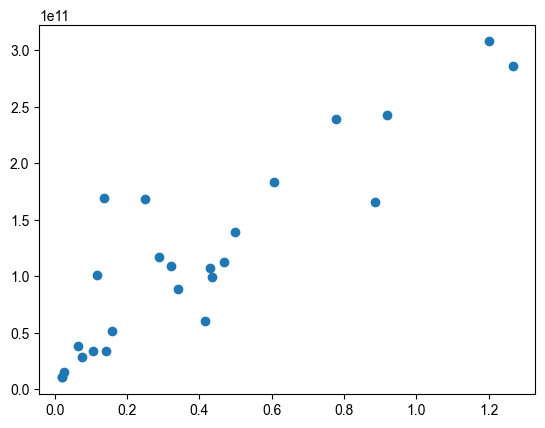

In [114]:
plt.scatter(feat, d_oh_ho2_beta['beta_o3'])

In [115]:
sens = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/region sensitivities.csv')
sens

,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
1,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432
2,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
3,YYN,1.673687,0.722490,1.303109,0.111641,1.284380,0.8195
4,QTP,3.846261,0.129504,1.263858,0.040323,3.043270,0.9387
5,KOR,-0.118734,0.239789,1.448416,0.076737,-0.081975,0.8943
6,JPN,-0.115629,0.076568,1.353738,0.053426,-0.085415,0.8596
7,GBR,-1.642956,0.112649,2.431756,0.110473,-0.675625,0.8225
8,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560


In [117]:
d_oh_ho2_beta['no__co_ch4_hcho'] = feat

In [119]:
d_oh_ho2_beta.to_csv('I6 temp.csv')
d_oh_ho2_beta = pd.read_csv('I6 temp.csv')

In [120]:
sens_data = sens.merge(d_oh_ho2_beta, how='left', left_on=['Region'], right_on=['region'])
sens_data

,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2,region,ho2_mole,o3,beta_o3,no__co_ch4_hcho
0,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649,NaN,NaN,NaN,NaN,NaN
1,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432,GBA,0.361639,7.919416e+11,2.863970e+11,1.266166
2,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741,CCE,0.195180,8.503646e+11,1.659744e+11,0.885477
3,YYN,1.673687,0.722490,1.303109,0.111641,1.284380,0.8195,YYN,0.170753,9.865132e+11,1.684498e+11,0.250871
4,QTP,3.846261,0.129504,1.263858,0.040323,3.043270,0.9387,QTP,0.128924,1.312702e+12,1.692391e+11,0.135235
5,KOR,-0.118734,0.239789,1.448416,0.076737,-0.081975,0.8943,KOR,0.114815,9.356500e+11,1.074264e+11,0.430573
6,JPN,-0.115629,0.076568,1.353738,0.053426,-0.085415,0.8596,JPN,0.154123,9.026263e+11,1.391158e+11,0.498293
7,GBR,-1.642956,0.112649,2.431756,0.110473,-0.675625,0.8225,GBR,0.249870,7.332032e+11,1.832053e+11,0.607293
8,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047,FRA,0.153248,7.642877e+11,1.171257e+11,0.287008
9,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560,DEU,0.371617,6.428799e+11,2.389052e+11,0.778122


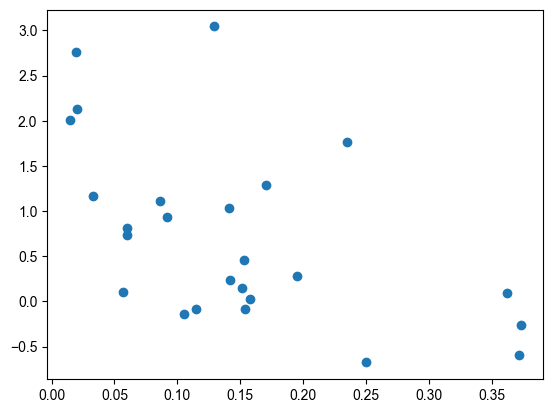

In [122]:
plt.scatter(sens_data['ho2_mole'], sens_data['SnSv'])